<a href="https://colab.research.google.com/github/raviteja-padala/Deep_Learning/blob/main/Bank_Churn_prediction_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Predicting Bank Churn with Deep Learning: An Artificial Neural Network Approach

## Objective:

The objective of this project is to implement an Artificial Neural Network (ANN) on a bank churn dataset to predict bank churn using a deep learning model.

 Dataset source : https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers/data

## Load Libraries:

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Load Dataset

In [3]:
# Loading the data
bank_data = pd.read_csv("https://raw.githubusercontent.com/raviteja-padala/Datasets/main/Bank_Customers_Churn.csv")

In [4]:
#top 5 rows of the dataset
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#info of the dataset
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Data Preprocessing:

Perform data preprocessing, including handling missing values, dropping unnecessary columns, and encoding categorical variables like "Geography" and "Gender."

In [6]:
#checking null values in the data
bank_data.isnull().sum().to_frame('No. of Nulls')

,No. of Nulls
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [7]:
#creating a copy of dataset to perfrm further actions
df = bank_data.copy()

In [8]:
#drop RowNumber,CustomerId,Surname columns
columns_to_drop= ['RowNumber','CustomerId','Surname']
df.drop(columns_to_drop, axis=1, inplace=True)

In [9]:
#encoding geography and gender columns

# Use the get_dummies function to perform one-hot encoding on the specified columns
df = pd.get_dummies(df, columns=['Geography', 'Gender'])

# Print the first few rows of the encoded DataFrame to see the results
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


## Train-Test Split:

Split the data into training and testing sets to evaluate the model's performance.

In [10]:
# Separate the features (X) and the target (y) from the DataFrame
X = df.drop(columns=['Exited'])  # Excluding the 'Exited' column as it is the target variable
y = df['Exited']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Print the dimensions of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 13)
X_test shape: (2000, 13)
y_train shape: (8000,)
y_test shape: (2000,)


## Data Scaling:
Apply data scaling to ensure that features are on the same scale.

In [12]:
# Import the StandardScaler from scikit-learn to standardize the features.
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object.
scaler = StandardScaler()

# Standardize the training data (X_train) to have a mean of 0 and a standard deviation of 1.
X_train = scaler.fit_transform(X_train)

# Standardize the test data (X_test) using the same scaling parameters as the training data.
X_test = scaler.transform(X_test)

# Model bulding

In [13]:
# Checking the tensorflow version
print(tf.__version__)

2.13.0


## Create a Sequential Neural Network Model:
Build a deep learning model using Keras' Sequential API. Define the architecture, including the number of layers, units, activation functions, and input dimensions.

In [14]:
# Import the necessary modules and classes from TensorFlow Keras for building a neural network.

# Import the TensorFlow Keras library.
import tensorflow.keras

# Import the Sequential model, which is used for creating a sequential neural network.
from tensorflow.keras.models import Sequential

# Import the Dense layer, which is used for adding fully connected (dense) layers to the neural network.
from tensorflow.keras.layers import Dense

# Import the Dropout layer, which is used for adding dropout regularization to prevent overfitting.
from tensorflow.keras.layers import Dropout

In [15]:
# Create a sequential neural network model.

# Calculate the input dimension based on the DataFrame with one-hot encoding
input_dim = len(df.columns) - 1

# Initialize the sequential model.
classifier = Sequential()

# Add the first hidden layer with 10 units, ReLU activation, and He normal initialization.
# The input_dim specifies the number of input features (in this case, 170).
classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu', input_dim=input_dim))

# Add a second hidden layer with 10 units, ReLU activation, and He normal initialization.
classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu'))

# Add the output layer with 1 unit, sigmoid activation, and Glorot (Xavier) initialization.
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

## Compile the Neural Network Model:
Configure the model by specifying the optimizer, loss function, and evaluation metrics.

In [16]:
# Compile the neural network model.

# Use the Adam optimizer, which is a popular optimization algorithm for training neural networks.
optimizer = 'adam'

# Use binary cross-entropy loss function for binary classification tasks.
loss = 'binary_crossentropy'

# Specify 'accuracy' as a metric to track during training.
metrics = ['accuracy']

# Compile the model with the specified optimizer, loss function, and metrics.
classifier.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [17]:
# Display a summary of the neural network model's architecture.

# Use the summary method to print a summary of the model's layers, parameters, and output shapes.
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 261 (1.02 KB)
Trainable params: 261 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the Neural Network Model:
Train the model on the training data and visualize the training and validation accuracy and loss curves.

In [18]:
# Train the neural network model and store the training history.

# Input:
# - X_train: Training data features.
# - y_train: Training data labels.
# - batch_size: Number of samples in each mini-batch during training (here, set to 10).
# - epochs: Number of times the entire training dataset is passed forward and backward through the network (here, set to 30).
# - validation_split: Fraction of the training data to be used for validation (here, set to 25%).

# The fit method trains the model on the training data and returns a history object that contains information about the training process.
model = classifier.fit(X_train, y_train, batch_size=10, epochs=50, validation_split=0.25)

Epoch 1/50
600/600 [==============================] - 9s 4ms/step - loss: 0.4815 - accuracy: 0.7862 - val_loss: 0.4602 - val_accuracy: 0.7960
Epoch 2/50
600/600 [==============================] - 2s 4ms/step - loss: 0.4484 - accuracy: 0.7975 - val_loss: 0.4471 - val_accuracy: 0.8025
Epoch 3/50
600/600 [==============================] - 3s 4ms/step - loss: 0.4340 - accuracy: 0.8072 - val_loss: 0.4402 - val_accuracy: 0.8095
Epoch 4/50
600/600 [==============================] - 2s 3ms/step - loss: 0.4260 - accuracy: 0.8158 - val_loss: 0.4347 - val_accuracy: 0.8145
Epoch 5/50
600/600 [==============================] - 2s 3ms/step - loss: 0.4188 - accuracy: 0.8235 - val_loss: 0.4299 - val_accuracy: 0.8170
Epoch 6/50
600/600 [==============================] - 2s 3ms/step - loss: 0.4134 - accuracy: 0.8270 - val_loss: 0.4249 - val_accuracy: 0.8180
Epoch 7/50
600/600 [==============================] - 2s 3ms/step - loss: 0.4080 - accuracy: 0.8277 - val_loss: 0.4213 - val_accuracy: 0.8155
Epoch 

In [19]:
# Retrieve the keys available in the training history dictionary.

# The training history dictionary contains metrics and measurements tracked during the training process.
# The keys represent specific metrics, such as training loss, training accuracy, validation loss, and validation accuracy.
# By using model_history.history.keys(), we can access these keys to analyze and visualize the training progress.
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
# Access the training accuracy values from the training history.

# The model_history object contains a history dictionary with metrics recorded during training.
# Using 'accuracy' as the key, we retrieve the training accuracy values at each epoch.
model.history['accuracy']

[0.7861666679382324,
 0.7975000143051147,
 0.8071666955947876,
 0.815833330154419,
 0.8234999775886536,
 0.8270000219345093,
 0.8276666402816772,
 0.8295000195503235,
 0.8314999938011169,
 0.8360000252723694,
 0.840833306312561,
 0.8471666574478149,
 0.8541666865348816,
 0.8548333048820496,
 0.8598333597183228,
 0.8603333234786987,
 0.8604999780654907,
 0.859666645526886,
 0.8606666922569275,
 0.859499990940094,
 0.8610000014305115,
 0.8604999780654907,
 0.8586666584014893,
 0.859666645526886,
 0.8604999780654907,
 0.85916668176651,
 0.859666645526886,
 0.8619999885559082,
 0.8636666536331177,
 0.8616666793823242,
 0.8629999756813049,
 0.8634999990463257,
 0.8621666431427002,
 0.8615000247955322,
 0.8634999990463257,
 0.8638333082199097,
 0.8628333210945129,
 0.8643333315849304,
 0.862500011920929,
 0.8615000247955322,
 0.8638333082199097,
 0.8641666769981384,
 0.8643333315849304,
 0.8633333444595337,
 0.8653333187103271,
 0.8628333210945129,
 0.8638333082199097,
 0.862666666507721,
 0

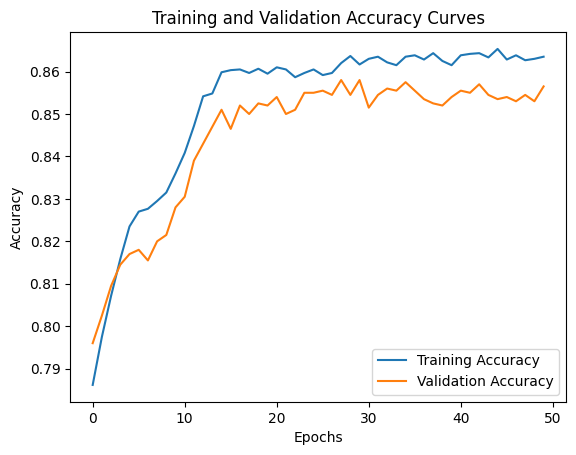

In [21]:
# Visualize the training and validation accuracy curves.

# Plot the training accuracy over epochs.
plt.plot(model.history['accuracy'], label='Training Accuracy')

# Plot the validation accuracy over epochs.
plt.plot(model.history['val_accuracy'], label='Validation Accuracy')

# Show the plot.
plt.legend()  # Display the legend to distinguish between training and validation curves.
plt.xlabel('Epochs')  # Label the x-axis as 'Epochs'.
plt.ylabel('Accuracy')  # Label the y-axis as 'Accuracy'.
plt.title('Training and Validation Accuracy Curves')  # Add a title to the plot.
plt.show()

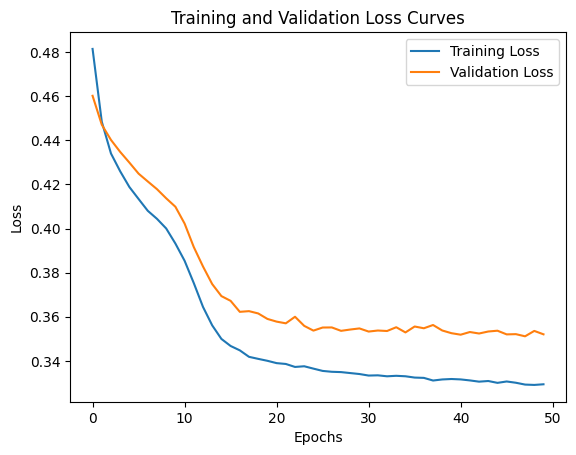

In [22]:
# Visualize the training and validation loss curves.

# Plot the training loss over epochs.
plt.plot(model.history['loss'], label='Training Loss')

# Plot the validation loss over epochs.
plt.plot(model.history['val_loss'], label='Validation Loss')

# Show the plot.
plt.legend()  # Display the legend to distinguish between training and validation curves.
plt.xlabel('Epochs')  # Label the x-axis as 'Epochs'.
plt.ylabel('Loss')  # Label the y-axis as 'Loss'.
plt.title('Training and Validation Loss Curves')  # Add a title to the plot.
plt.show()

## Predict and Evaluate Binary Classification Results:
Use the trained model to predict customer churn and evaluate its performance using metrics like accuracy and confusion matrix.

In [23]:
# Predicting and evaluating binary classification results.

# Predict class probabilities for the test dataset using the trained model.
y_pred_prob =classifier.predict(X_test)

# Convert predicted probabilities into binary predictions using a threshold of 0.5.
# If the predicted probability is greater than or equal to 0.5, it's classified as 1; otherwise, it's classified as 0.
y_pred = (y_pred_prob > 0.5)

print(y_pred)

63/63 [==============================] - 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [24]:
print(type(y_test))
print(type(y_pred))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [25]:
# Convert the pandas Series to numpy arrays before reshaping
y_test_array = y_test.to_numpy()

# Concatenate and display a comparison between predicted and true labels for evaluation
result = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test_array.reshape(len(y_test_array), 1)), axis=1)
print(result)

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy Score", accuracy_score(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Accuracy Score 0.8565
Confusion Matrix
[[1498   97]
 [ 190  215]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.69      0.53      0.60       405

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [38]:
# the goal is to use this ANN model to predict the probability of the customer leaving the bank
# Predicting the churn probability for single observations

#Geography: French
#Credit Score:600
#Gender: Male
#Age: 40 years old
#Tenure: 3 years
#Balance: $60000
#Number of Products: 2
#with Credit Card
#Active member
#Estimated Salary: $50000

# Ignore the feature names warning
scaler.feature_names_in_ = None

print(classifier.predict(scaler.transform([[1, 0, 0, 600, 1, 0, 40, 3, 60000, 2, 1, 1, 50000]])))
print(classifier.predict(scaler.transform([[1, 0, 0, 600, 1, 0, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 77ms/step
[[0.]]
1/1 [==============================] - 0s 36ms/step
[[False]]


## Hyperparameter Tuning:

Improve the model's performance through hyperparameter tuning.

Build a neural network model with hyperparameters to be tuned.
Set up a RandomSearch tuner for hyperparameter optimization.
Initiate the hyperparameter search using the Keras Tuner.

In [28]:
#hyperparameter tunig with keras tuner

!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 9.9 MB/s eta 0:00:00


In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# Define a function to build a neural network model with hyperparameters for tuning.

def build_model(hp):
    # Create a Sequential model.
    model = Sequential()

    # Add the first hidden layer with a dynamic number of units based on hyperparameter tuning.
    model.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu', input_dim=input_dim))

    # Add a second hidden layer with a dynamic number of units.
    model.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu'))

    # Add the output layer with a single unit for binary classification using sigmoid activation.
    model.add(Dense(1, activation='sigmoid'))

    # Choose an optimizer based on hyperparameter tuning.
    optimizer = hp.Choice("optimizer", values=["adam", "sgd", "rmsprop", "adadelta"])

    # Compile the model with the selected optimizer, binary cross-entropy loss, and accuracy metric.
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

Using TensorFlow backend


<ipython-input-29-3f0de72147a1>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [30]:
# Set up a RandomSearch tuner for hyperparameter optimization.

# Input:
# - build_model: The function that defines the neural network architecture with tunable hyperparameters.
# - objective: The metric to optimize during hyperparameter search (here, set to 'val_accuracy' for validation accuracy).
# - max_trials: The maximum number of hyperparameter combinations to try during the search (here, set to 5).
# - directory: The directory where the tuner's results and logs will be stored (e.g., 'project1').
# - project_name: The name of the project or experiment (e.g., 'aps-fault').

# The RandomSearch tuner explores different hyperparameter combinations to optimize the specified metric.
tuner = RandomSearch(
    build_model,  # Function defining the model architecture with tunable hyperparameters.
    objective='val_accuracy',  # Metric to optimize (validation accuracy in this case).
    max_trials=10,  # Maximum number of hyperparameter combinations to try.
    directory='project1',  # Directory to store tuner results and logs.
    project_name='bank_churn_ann'  # Name of the project or experiment.
)


In [31]:
# Initiate the hyperparameter search using the Keras Tuner.

# Input:
# - X_train: Training data features.
# - y_train: Training data labels.
# - validation_data: Validation data to evaluate the model's performance during the search (here, using X_test and y_test).
# - epochs: Number of training epochs for each hyperparameter combination (here, set to 5).

# The search method explores different hyperparameter combinations and trains the model with each combination.
# It evaluates the model's performance on the validation data and tracks the specified objective metric.
tuner.search(
    X_train,  # Training data features.
    y_train,  # Training data labels.
    validation_data=(X_test, y_test),  # Validation data for performance evaluation.
    epochs=5  # Number of training epochs for each hyperparameter combination.
)

Trial 4 Complete [00h 00m 11s]
val_accuracy: 0.8535000085830688

Best val_accuracy So Far: 0.8615000247955322
Total elapsed time: 00h 00m 45s


In [32]:
# Retrieve the values of the best hyperparameters found during hyperparameter tuning.

# The tuner.get_best_hyperparameters() function fetches information about the best hyperparameters
# discovered by the hyperparameter tuning process.
# [0] is used to access the first (typically the only) set of best hyperparameters.
# .values extracts the specific values of these best hyperparameters.

# The result is a dictionary containing the best hyperparameter values that led to the optimal model performance.
best_hyperparameter_values = tuner.get_best_hyperparameters()[0].values
best_hyperparameter_values

{'optimizer': 'rmsprop'}

## Get the Best Model

Select the best model resulting from hyperparameter tuning.

In [33]:
# Get the best model for MODEL
best_model = tuner.get_best_models(num_models=1)[0]

In [34]:
# Display a summary of the neural network model.

# The mymodel.summary() method is used to print a comprehensive summary of the model's layers,
# the shape of each layer's output, and the total number of parameters.
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train with the Best Model:
Train the selected best model with the tuned hyperparameters.

In [35]:
# Train the best model for MODEL
best_model.fit(X_train, y_train, batch_size=10, epochs=30, validation_split=0.25)

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.3469 - accuracy: 0.8550 - val_loss: 0.3568 - val_accuracy: 0.8580
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3419 - accuracy: 0.8592 - val_loss: 0.3624 - val_accuracy: 0.8575
Epoch 3/30
600/600 [==============================] - 4s 7ms/step - loss: 0.3398 - accuracy: 0.8590 - val_loss: 0.3636 - val_accuracy: 0.8590
Epoch 4/30
600/600 [==============================] - 4s 7ms/step - loss: 0.3368 - accuracy: 0.8603 - val_loss: 0.3573 - val_accuracy: 0.8540
Epoch 5/30
600/600 [==============================] - 3s 6ms/step - loss: 0.3342 - accuracy: 0.8630 - val_loss: 0.3620 - val_accuracy: 0.8550
Epoch 6/30
600/600 [==============================] - 5s 8ms/step - loss: 0.3329 - accuracy: 0.8648 - val_loss: 0.3630 - val_accuracy: 0.8570
Epoch 7/30
600/600 [==============================] - 4s 6ms/step - loss: 0.3315 - accuracy: 0.8643 - val_loss: 0.3703 - val_accuracy: 0.8555
Epoch 

## Predict and Evaluate Binary Classification Results with the Best Model:
Use the best model to predict customer churn and assess its performance.

In [36]:
# Predicting and evaluating binary classification results.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Predict class probabilities for the test dataset using the trained model.
y_pred_probabilities = best_model.predict(X_test)

# Convert predicted probabilities into binary predictions using a threshold of 0.5.
# If the predicted probability is greater than or equal to 0.5, it's classified as 1; otherwise, it's classified as 0.
y_prediction = (y_pred_probabilities > 0.5)

# Confusion Matrix
confusion_matrix_result = confusion_matrix(y_test, y_prediction)
print("Accuracy Score", accuracy_score(y_test, y_prediction))
print("Confusion Matrix")
print(confusion_matrix_result)
print(classification_report(y_test, y_prediction))

63/63 [==============================] - 0s 1ms/step
Accuracy Score 0.856
Confusion Matrix
[[1503   92]
 [ 196  209]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.69      0.52      0.59       405

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [37]:
# the goal is to use this ANN model to predict the probability of the customer leaving the bank
# Predicting the churn probability for single observations

#Geography: French
#Credit Score:600
#Gender: Male
#Age: 40 years old
#Tenure: 3 years
#Balance: $60000
#Number of Products: 2
#with Credit Card
#Active member
#Estimated Salary: $50000

# Ignore the feature names warning
scaler.feature_names_in_ = None

print(best_model.predict(scaler.transform([[1, 0, 0, 600, 1, 0, 40, 3, 60000, 2, 1, 1, 50000]])))
print(best_model.predict(scaler.transform([[1, 0, 0, 600, 1, 0, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 17ms/step
[[0.]]
1/1 [==============================] - 0s 17ms/step
[[False]]


## Conclusion:

This project demonstrated the effectiveness of employing an Artificial Neural Network (ANN) to predict bank churn. The structured workflow encompassed critical phases, including data preprocessing, model development, training, and evaluation. The incorporation of hyperparameter tuning aimed at enhancing the model's performance resulted in the selection of the best-performing model.

Comparing the baseline model to the hyperparameter-tuned model, both exhibited closely similar classification results. Notably, it was observed that further improvements in model performance could potentially be achieved by augmenting the dataset size. The application of deep learning principles and hyperparameter optimization techniques holds promise for delivering more precise forecasts of bank churn, thereby offering invaluable insights for customer retention strategies within the  banking industry.